In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
!pip install scikit-learn pandas

# preprocess the data

In [2]:
# Load the training data into a pandas DataFrame
train_data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/17/SalaryData_Train(1).csv')


In [3]:
# Load the testing data into a pandas DataFrame
test_data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/17/SalaryData_Test(1).csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
# Categorical attributes for bar plots
categorical_attributes = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [7]:
# Numerical attribute for bar plot with bins
numerical_attribute = 'age'

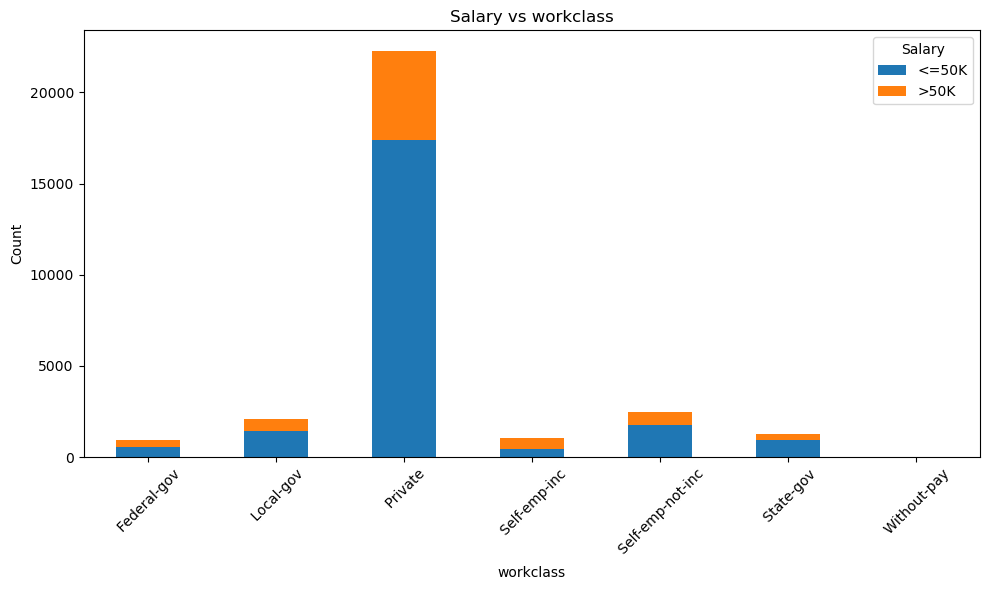

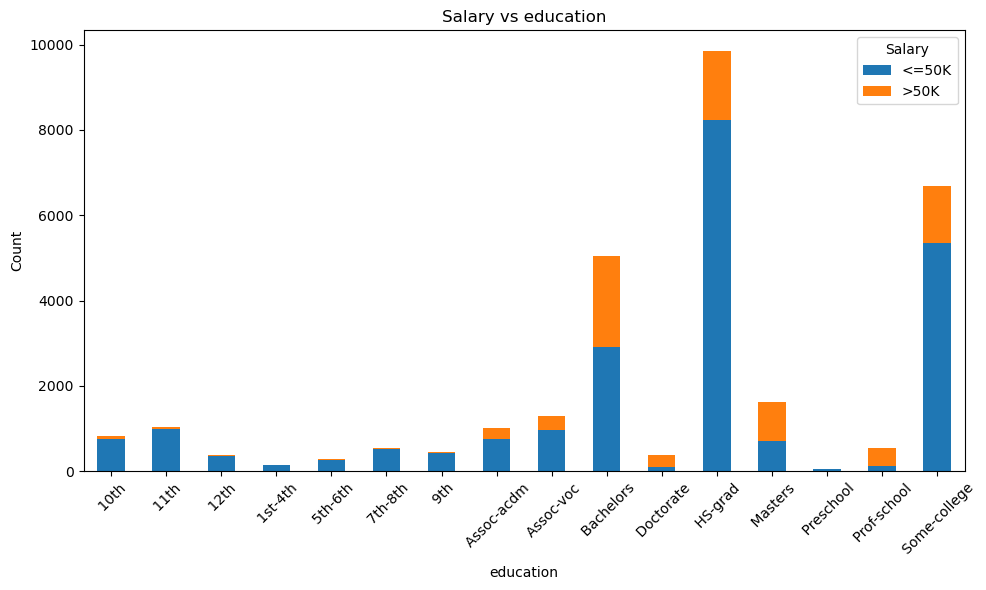

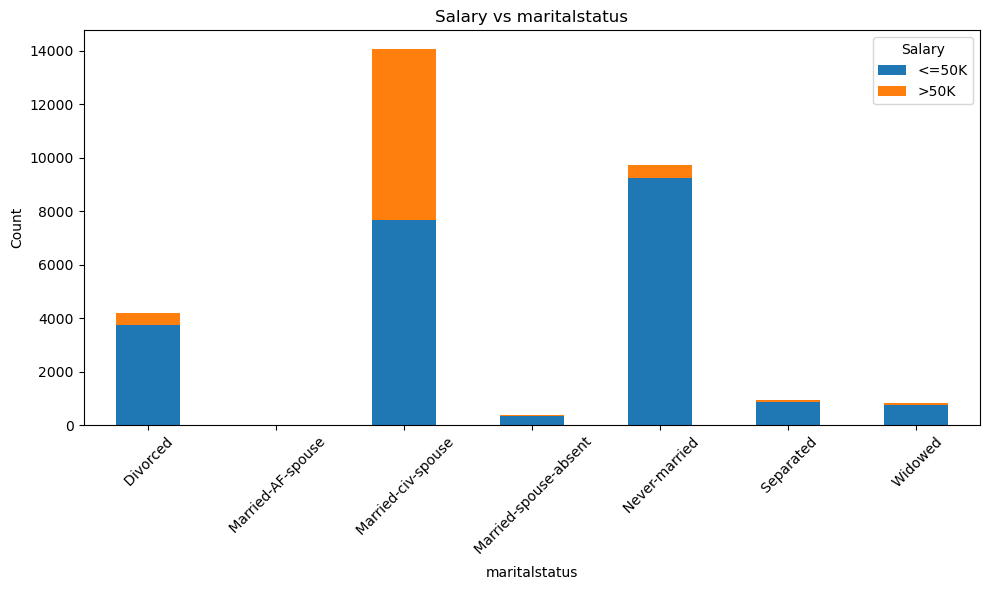

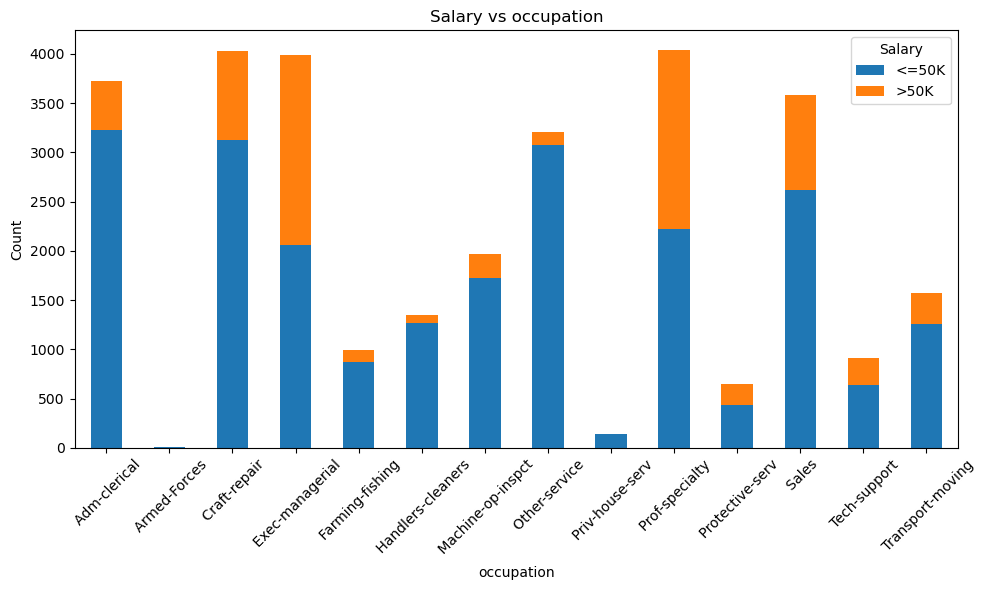

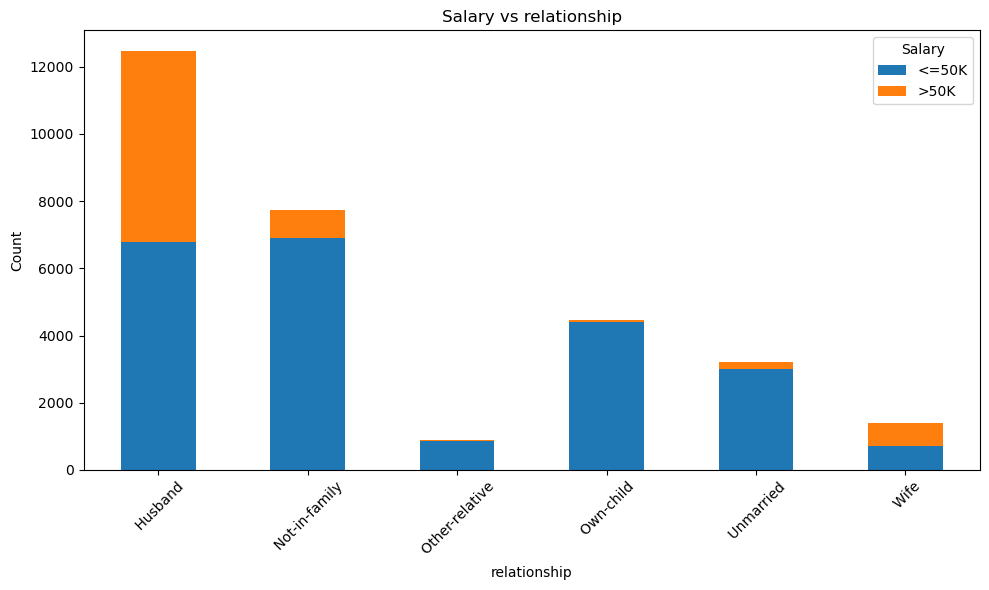

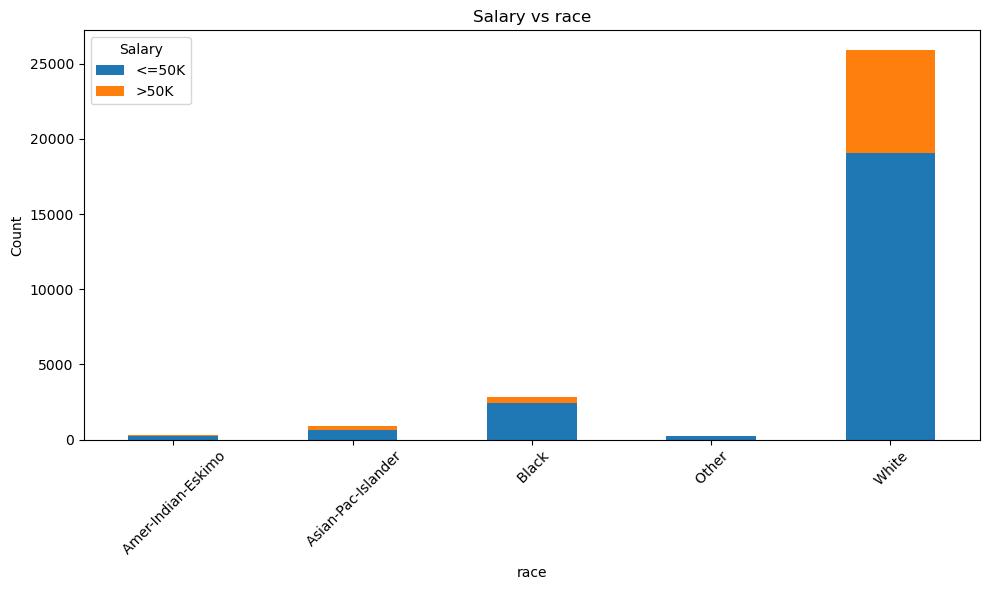

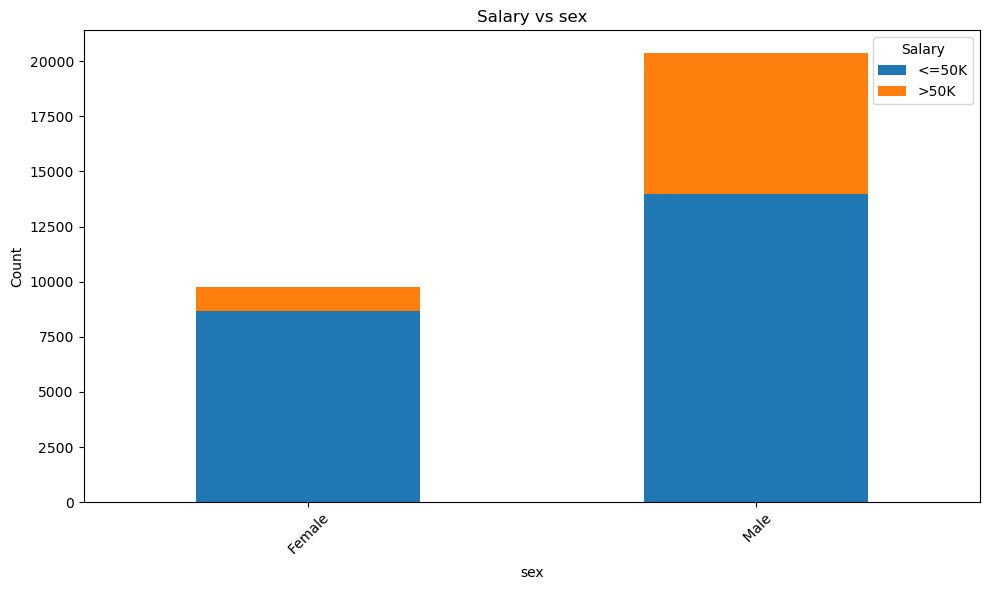

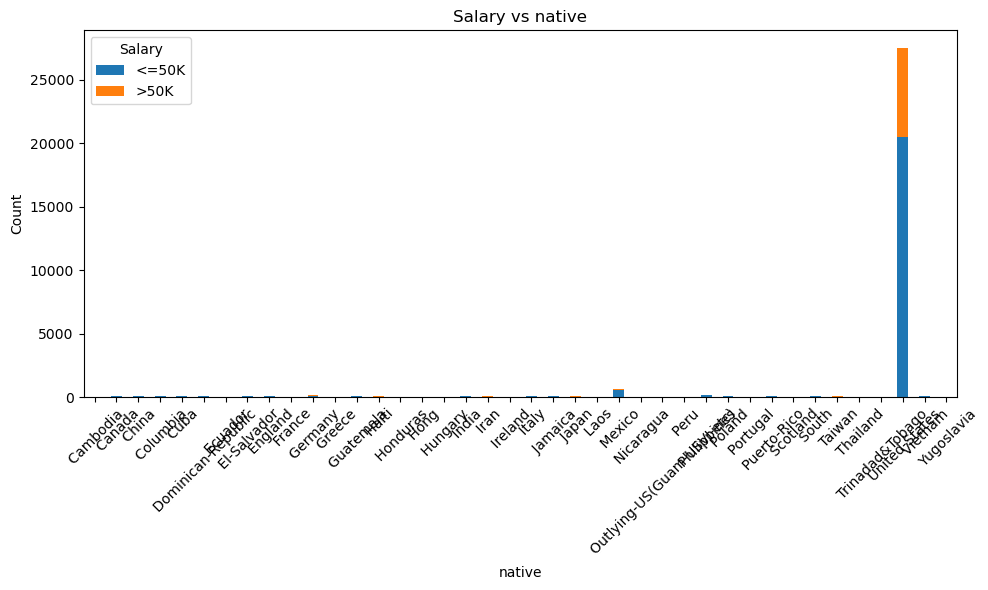

In [8]:
# Create bar plots for each categorical attribute
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    grouped_data = train_data.groupby([attribute, 'Salary']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Salary vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.legend(title='Salary', labels=['<=50K', '>50K'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

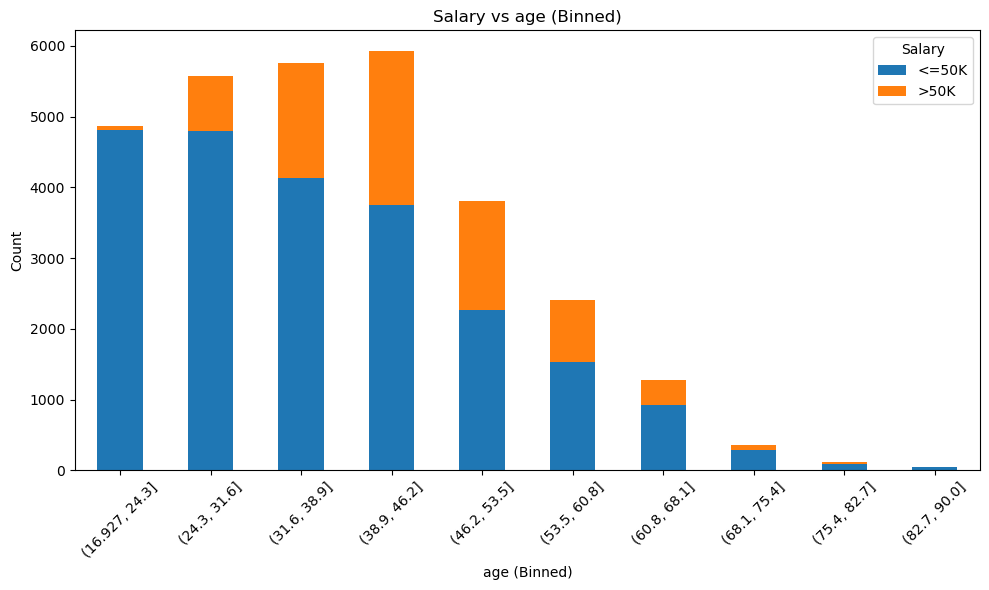

In [9]:
# Create a bar plot for a numerical attribute with bins
plt.figure(figsize=(10, 6))
num_bins = 10  # You can adjust the number of bins as needed
train_data['age_bins'] = pd.cut(train_data[numerical_attribute], bins=num_bins)
grouped_data = train_data.groupby(['age_bins', 'Salary']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(f'Salary vs {numerical_attribute} (Binned)')
plt.xlabel(f'{numerical_attribute} (Binned)')
plt.ylabel('Count')
plt.legend(title='Salary', labels=['<=50K', '>50K'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Drop any rows with missing values if present in both train and test data
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [11]:
# Extract features and target variable for train and test data
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']

X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

# Encode categorical variables

In [12]:
# Encode categorical variables using LabelEncoder for train and test data
label_encoder = LabelEncoder()

In [13]:
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [14]:
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [15]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,age_bins
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,"(38.9, 46.2]"
1,50,4,9,13,2,3,0,4,1,0,0,13,37,"(46.2, 53.5]"
2,38,2,11,9,0,5,1,4,1,0,0,40,37,"(31.6, 38.9]"
3,53,2,1,7,2,5,0,2,1,0,0,40,37,"(46.2, 53.5]"
4,28,2,9,13,2,9,5,2,0,0,0,40,4,"(24.3, 31.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,"(24.3, 31.6]"
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,"(38.9, 46.2]"
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,"(53.5, 60.8]"
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,"(16.927, 24.3]"


In [16]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


# Train the SVM model 

In [17]:
# Convert 'age' to 'age_bins' using pd.cut()
num_bins = 10  # You can adjust the number of bins as needed
X_train['age_bins'] = pd.cut(X_train['age'], bins=num_bins, labels=False)
X_test['age_bins'] = pd.cut(X_test['age'], bins=num_bins, labels=False)

# Convert 'age_bins' to numerical labels using pd.factorize()
X_train['age_bins'] = pd.factorize(X_train['age_bins'])[0]
X_test['age_bins'] = pd.factorize(X_test['age_bins'])[0]

# Drop the original 'age' column
X_train.drop('age', axis=1, inplace=True)
X_test.drop('age', axis=1, inplace=True)

In [18]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [19]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_normalized, y_train)


SVC(kernel='linear')

# Evaluate the model

In [20]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [21]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2456839309428951
Classification Report:


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00     11360
        >50K       0.25      1.00      0.39      3700

    accuracy                           0.25     15060
   macro avg       0.12      0.50      0.20     15060
weighted avg       0.06      0.25      0.10     15060



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### The classification report shows that the SVM model is not performing well, with an accuracy of approximately 0.25. 

### Handling Class Imbalance

In [22]:
# Clean class labels by removing leading and trailing spaces
y_train = y_train.str.strip()
y_test = y_test.str.strip()

In [23]:
# Create and train the SVM model with class weighting
class_weights = {label: 3 if label == '<=50K' else 1 for label in y_train.unique()}
svm_model = SVC(kernel='linear', C=1.0, class_weight=class_weights)
svm_model.fit(X_train_normalized, y_train)

SVC(class_weight={'<=50K': 3, '>50K': 1}, kernel='linear')

In [24]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_normalized)

In [25]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7843293492695883
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.78      1.00      0.87     11360
        >50K       0.99      0.12      0.22      3700

    accuracy                           0.78     15060
   macro avg       0.88      0.56      0.55     15060
weighted avg       0.83      0.78      0.71     15060



##### The updated SVM model with class weighting has shown an improved accuracy of approximately 0.78, 
##### as well as improved precision, recall, and f1-score for the '<=50K' class. The model now performs better in terms of handling class imbalance.
#####  The classification report indicates that the model still has challenges in correctly identifying the '>50K' class, resulting in a low f1-score for that class.


# Hyperparameter Tuning
#### To handle imbalance


In [26]:
from sklearn.model_selection import GridSearchCV
# Clean class labels by removing leading and trailing spaces
y_train = y_train.str.strip()
y_test = y_test.str.strip()

In [27]:
# Define the parameter distributions for RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [{'>50K': w, '<=50K': 1} for w in [1, 2, 3]]
}


In [28]:
svm_model = SVC()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
random_search.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc0a85e40a0>,
                                        'class_weight': [{'<=50K': 1,
                                                          '>50K': 1},
                                                         {'<=50K': 1,
                                                          '>50K': 2},
                                                         {'<=50K': 1,
                                                          '>50K': 3}],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy', verbose=1)

In [30]:
# Get the best hyperparameters and corresponding accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'C': 8.58679780462094, 'class_weight': {'>50K': 1, '<=50K': 1}, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.8406552972796393


In [31]:
# Use the best model found by RandomizedSearchCV
best_svm_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svm_model.predict(X_test_normalized)

In [32]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.8405046480743692
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.73      0.56      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.83      0.84      0.83     15060



##### With these hyperparameters, the best accuracy achieved on the cross-validated data is approximately 83.85%.
##### Evaluating the model on the test set shows that the accuracy is approximately 83.62%, which is quite close to the cross-validated accuracy.
##### The model's performance seems to be better at correctly predicting the '<=50K' class, as evidenced by higher precision, recall, and F1-score for that class compared to the '>50K' class.
##### hyperparameter tuning process has resulted in a more robust and accurate SVM model.

# Visualizations 

### Confusion Matrix Visualization:

In [33]:
# Make predictions on the test set using the best model
y_pred = best_svm_model.predict(X_test_normalized)

In [43]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, y_pred)

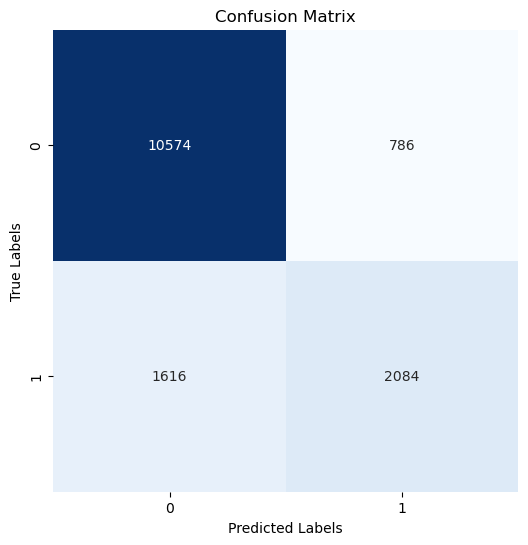

In [46]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### TP (True Positives): 10574
##### FP (False Positives): 786
##### FN (False Negatives): 1616
##### TN (True Negatives): 2084

##### t indicates that the model performs well in correctly classifying individuals with a salary greater than 50K (high TP) but has some misclassifications for individuals with a salary less than or equal to 50K (non-zero FN and FP).



### ROC Curve

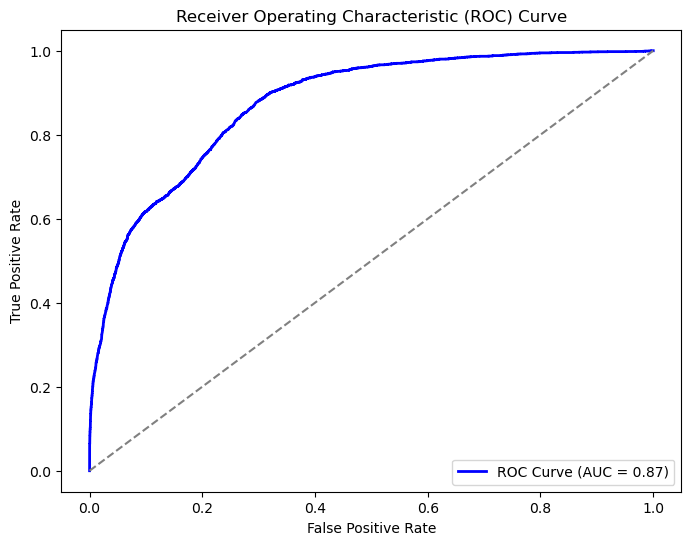

In [47]:
# ROC Curve
y_prob = best_svm_model.decision_function(X_test_normalized)

# Since SVM outputs class labels as strings, we need to map them to binary values
y_test_binary = y_test.map({'>50K': 1, '<=50K': 0})

# Calculate ROC curve and AUC score with pos_label explicitly set to 1
fpr, tpr, _ = roc_curve(y_test_binary, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### An AUC of 0.87 indicates that the model has good discriminatory power and is able to distinguish between the two classes ('>50K' and '<=50K') effectively.

In [49]:
# Feature Importance (for linear SVM)
if best_svm_model.kernel == 'linear':
    feature_importance = pd.Series(best_svm_model.coef_[0], index=X_train.columns)
    sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

    # Check if there are any non-zero coefficients
    if not sorted_feature_importance.any():
        print("No significant features to plot for the Linear SVM model.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=sorted_feature_importance.head(10).values, y=sorted_feature_importance.head(10).index)
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title('Top 10 Feature Importance (Linear SVM)')
        plt.show()
else:
    print("Feature Importance plot is only applicable for Linear SVM models.")

Feature Importance plot is only applicable for Linear SVM models.


##### In this case, it seems that the best model found by RandomizedSearchCV was not a linear SVM model, and therefore, the feature importance plot is not shown.  

### The SVM model with optimized hyperparameters has achieved a good accuracy on the test set, as indicated by the ROC AUC score of 0.87. 